## **Configuración del Ambiente**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

## **Carga de Datos**

In [ ]:
df_train =pd.read_csv('train.csv')
df_test =pd.read_csv('test.csv')

Visualización general de los datos

In [ ]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
531,532,0,3,"Toufik, Mr. Nakli",male,NaN,0,0,2641,7.2292,NaN,C
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C


In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
185,1077,2,"Maybery, Mr. Frank Hubert",male,40.0,0,0,239059,16.0000,NaN,S
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,NaN,S
133,1025,3,"Thomas, Mr. Charles P",male,NaN,1,0,2621,6.4375,NaN,C
106,998,3,"Buckley, Mr. Daniel",male,21.0,0,0,330920,7.8208,NaN,Q
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0000,B52 B54 B56,S


In [ ]:
df_test.shape

(418, 11)

## **Análisis Exploratorio de los Datos**

### **Análisis Exploratorio General**

In [ ]:
#ver información general de los datos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#ver valores duplicados
df_train.duplicated().sum()

0

In [ ]:
#ver valores nulos
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Se puede observar que existen 687 datos nulos en la columna *Cabin*, lo cual son demasiados y se puede considerar eliminar la columna en caso de no ser relevante

In [ ]:
#valores unicos
df_train.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


Al analizar la cantidad de valores únicos de cada columna se puede determinar que columnas como *PassengerId*, *Ticket* y *Fare* no aportarían al modelod de clasificación debido a que tienen varios valores únicos

In [ ]:
#ver los valores unicos de las columnas categóricas

columnas_categoricas = df_train.select_dtypes(include=['object']).columns

for columna in columnas_categoricas:
  if df_train[columna].nunique() < 10:
    valores_unicos = df_train[columna].unique()
    print(f"Valores únicos en la columna '{columna}':")
    print(valores_unicos)

Valores únicos en la columna 'Sex':
['male' 'female']
Valores únicos en la columna 'Embarked':
['S' 'C' 'Q' nan]


In [ ]:
# ver valores únicos de las columnas numéricas

columnas_numericas = df_train.select_dtypes(include=['int64', 'float64']).columns

for columna in columnas_numericas:
  if df_train[columna].nunique() < 10:
    valores_unicos = df_train[columna].unique()
    print(f"Valores únicos en la columna '{columna}':")
    print(valores_unicos)

Valores únicos en la columna 'Survived':
[0 1]
Valores únicos en la columna 'Pclass':
[3 1 2]
Valores únicos en la columna 'SibSp':
[1 0 3 4 2 5 8]
Valores únicos en la columna 'Parch':
[0 1 2 5 3 4 6]


### **Analisis Exploratorio Gráfico**

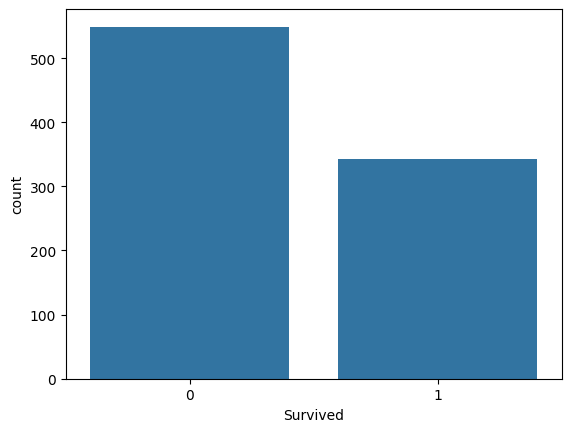

Porcentaje de Sobrevivientes:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [ ]:
sns.countplot(data=df_train, x='Survived')
plt.show()
print('Porcentaje de Sobrevivientes:')
print(df_train['Survived'].value_counts('%'))

Se observa que un 61,61% de los pasajeros falleció

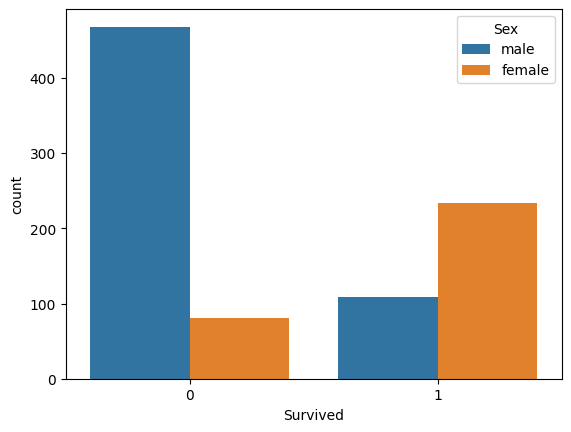

Porcentaje de Sobrevivientes:
Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64


In [ ]:
#análisis de supervivencia con base a la variable Sex

sns.countplot(data=df_train, x='Survived', hue='Sex')
plt.show()
print('Porcentaje de Sobrevivientes:')
print(df_train.groupby('Sex')['Survived'].value_counts('%'))

Al hacer el análisis con base a la variable *Sex* se puede observar que esta variable puede ser importante para el desarrollo del modelo predictivo, debido a que las mujeres tienen un mayor porcentaje de sobrevivencia

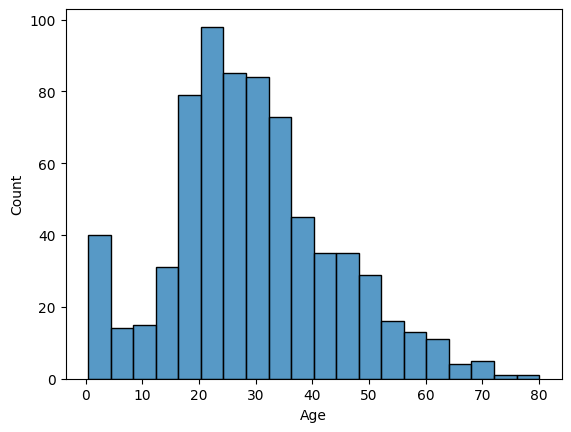

In [ ]:
#analisis de la columna Age

sns.histplot(data=df_train, x='Age')
plt.show()

In [ ]:
df_train['Age'].mean()

29.69911764705882

In [ ]:
df_train.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

## **Tratamiento y Preprocesamiento de los Datos**

Se eliminan las columnas que no son necesarias para el modelo

In [ ]:
df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Fare'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Fare'], axis=1, inplace=True)

In [ ]:
df_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
714,0,2,male,52.0,0,0,S
30,0,1,male,40.0,0,0,C
292,0,2,male,36.0,0,0,C
314,0,2,male,43.0,1,1,S
848,0,2,male,28.0,0,1,S


La columna *Age* tiene 177 valores nulos, por lo que requiere ser tratada. Al ser una columna importante para el desarrollo del modelo se puede considerar rellenar esos valores nulos.

Para este análisis se decidió llenar los valores nulos con la mediana, y para hacer un relleno más distribuido se hace una imputación basada en grupos, en este caso tomando como referencia las columnas *Sexo* y *Pclass*

In [ ]:
df_train['Age'] = df_train.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

Para la columna *Embarked* que tiene 2 valores nulos, lo más apropiado sería rellenar estos valores con la moda, que es el valor más frecuente.

In [ ]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

<ipython-input-21-ad2723249ae2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)


In [ ]:
df_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Embarked,0


Se convierte las columnas categóricas a numéricas utilizando OrdinalEncoder

In [ ]:
#Selecciona columnas categóricas de mi DataFrame
col_categorica = ['Sex', 'Embarked']
# Crear el objeto OrdinalEncoder
encoder = OrdinalEncoder()
# Aplicar la transformación a las columnas categóricas
df_train[col_categorica] = encoder.fit_transform(df_train[col_categorica])

In [ ]:
df_train.sample(5)


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
319,1,1,0.0,40.0,1,1,0.0
182,0,3,1.0,9.0,4,2,2.0
268,1,1,0.0,58.0,0,1,2.0
204,1,3,1.0,18.0,0,0,2.0
143,0,3,1.0,19.0,0,0,1.0


In [ ]:
df_train['Age'] = df_train['Age'].round().astype(int)

In [ ]:
encoder.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

En la column ***Sex*** se transformó:


*   *female* --> 0
*  *male* --> 1

En la columna ***Embarked*** se transformó:


*   *C* --> 0
*   *Q* --> 1
*   *S* --> 2






## **Modelado**

In [ ]:
#separación de predictoras y target
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state = 50)

In [ ]:
model_RFC = RandomForestClassifier(random_state=50)
model_RFC.fit(train_x, train_y)

RandomForestClassifier(random_state=50)

In [ ]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = model_RFC.predict(test_x)

# Evaluar el modelo
accuracy = accuracy_score(test_y, y_pred)
report = classification_report(test_y, y_pred)


In [ ]:
# Mostrar resultados
print(f'Accuracy del modelo: {accuracy:.4f}')
print('\nReporte de clasificación:\n', report)

Accuracy del modelo: 0.8072

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84       130
           1       0.83      0.68      0.75        93

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.80       223



In [ ]:
def pronosticar_PCA(train_x, test_x, train_y, test_y, n_components=6):
    # Aplicar PCA
    pca = PCA(n_components=n_components)
    train_x_pca = pca.fit_transform(train_x)
    test_x_pca = pca.transform(test_x)

    # Entrenar el modelo
    model = RandomForestClassifier(random_state=50)
    model.fit(train_x_pca, train_y)

    # Evaluar en el conjunto de prueba
    test_score = model.score(test_x_pca, test_y)

    # Imprimir resultados
    print(f"Accuracy en prueba con PCA: {test_score:.4f}")

In [ ]:
pronosticar_PCA(train_x, test_x, train_y, test_y)

Accuracy en prueba con PCA: 0.7937
